In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2

In [15]:
base_model = MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
datagen = ImageDataGenerator(rescale=1.0/255)

In [7]:
train_path = '/content/drive/MyDrive/Datasets/11 Flowers/train/'
test_path = '/content/drive/MyDrive/Datasets/11 Flowers/test/'

In [8]:
train = datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    class_mode="categorical",
    batch_size=64
)

Found 3250 images belonging to 5 classes.


In [12]:
classes = [x for x in train.class_indices.keys()]

In [9]:
test = datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    class_mode="categorical",
    batch_size=64
)

Found 530 images belonging to 5 classes.


In [16]:
# Architecture Defination

output = base_model.output

output = keras.layers.GlobalAveragePooling2D()(output)

output = keras.layers.Dense(128, activation="relu")(output)

output = keras.layers.Dense(len(classes), activation="softmax")(output)

In [18]:
model = keras.models.Model(base_model.input, output)

In [19]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 939s 16s/step - accuracy: 0.6201 - loss: 1.0237 - val_accuracy: 0.7019 - val_loss: 0.8410
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 782s 14s/step - accuracy: 0.9353 - loss: 0.2512 - val_accuracy: 0.7509 - val_loss: 0.7496
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 751s 14s/step - accuracy: 0.9729 - loss: 0.1286 - val_accuracy: 0.7604 - val_loss: 0.7066
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 690s 13s/step - accuracy: 0.9903 - loss: 0.0745 - val_accuracy: 0.7906 - val_loss: 0.6083
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 685s 13s/step - accuracy: 0.9937 - loss: 0.0528 - val_accuracy: 0.8038 - val_loss: 0.5902
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 696s 14s/step - accuracy: 0.9962 - loss: 0.0396 - val_accuracy: 0.8132 - val_loss: 0.5246
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 726s 13s/step - accuracy: 0.9992 - loss: 0.0250 - val_accuracy: 0.8283 - val_loss: 0.4747
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 675s 13s/step - accuracy: 0.9970 - loss: 0.0273 - val_accuracy: 0.8415 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


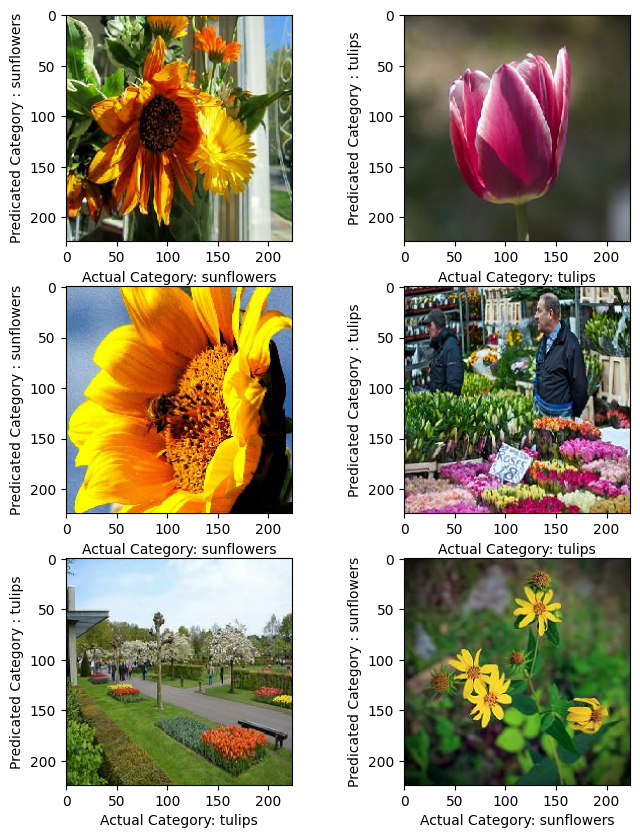

In [26]:
plt.figure(figsize=(8,10))

for x in range(6):
  image = test[0][0][x]
  image = np.expand_dims(image, axis=0)

  plt.subplot(3,2,x + 1)
  plt.xlabel(f"Actual Category: {classes[np.argmax(test[0][1][x])]}")
  plt.ylabel(f"Predicated Category : {classes[np.argmax(model.predict(image))]}")
  plt.imshow(image[0])